<a href="https://colab.research.google.com/github/soltiste/ii-in-economi/blob/main/Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Загрузите данные из файла data-logistic.csv. Это двумерная выборка, целевая переменная на которой принимает значения -1 или 1.
2. Убедитесь, что выше выписаны правильные формулы для градиентного спуска. Обратите внимание, что мы используем полноценный градиентный спуск, а не его стохастический вариант!
3. Реализуйте градиентный спуск для обычной и L2-регуляризованной
(с коэффициентом регуляризации 10) логистической регрессии. Используйте длину шага k=0.1. В качестве начального приближения
используйте вектор (0, 0).
4. Запустите градиентный спуск и доведите до сходимости (евклидово
расстояние между векторами весов на соседних итерациях должно быть не больше 1e-5). Рекомендуется ограничить сверху число
итераций десятью тысячами.
5. Какое значение принимает AUC-ROC на обучении без регуляризации и при ее использовании? Эти величины будут ответом на
задание. В качестве ответа приведите два числа через пробел. Обратите внимание, что на вход функции roc_auc_score нужно подавать оценки вероятностей, подсчитанные обученным алгоритмом.
Для этого воспользуйтесь сигмоидной функцией: a(x) = 1/(1 +
exp(−w1x1 − w2x2)).
6. Попробуйте поменять длину шага. Будет ли сходиться алгоритм,
если делать более длинные шаги? Как меняется число итераций
при уменьшении длины шага?
7. Попробуйте менять начальное приближение. Влияет ли оно на чтонибудь?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('/content/drive/MyDrive/data-logistic.csv',
                 header=None,
                 names=['1', '2', '3'])
df

,1,2,3
0,-1,-0.663827,-0.138526
1,1,1.994596,2.468025
2,-1,-1.247395,0.749425
3,1,2.309374,1.899836
4,1,0.849143,2.407750
...,...,...,...
200,1,4.245176,3.053931
201,1,2.437935,1.357804
202,-1,-1.876638,1.533398
203,1,-6.824446,-13.934211


In [3]:
X = df[['2', '3']].values
y = df[['1']].values
lenth = len(y)

In [21]:
def func_loc_prod(i, w):
    return 1.0 / (1.0 + np.exp(-y[i] * (w[0]*X[i][0] + w[1]*X[i][1])))

def new_w(X, y, how_w, w, C, k=0.1):
    return w[how_w] + ((sum([y[i]*X[i][how_w]*(1.0 - func_loc_prod(i, w)) for i in np.arange(0, lenth)]))*k)/ lenth - k*C*w[how_w]

def grad_reg(X, y, w=np.array([0, 0]), C = 0, e=0.00001, max_step=10000, k=0.1):
    for s in range(max_step):
        w_prev = w
        w = np.array([new_w(X, y, 0, w, C, k), new_w(X, y, 1, w, C, k)])
        if LA.norm((w - w_prev)) <= e:
            break
    return w

w = grad_reg(X, y)
w_reg = grad_reg(X, y, w=np.array([0, 0]), C=10)
print(*w)
print(*w_reg)

[0.28781162] [0.0919833]
[0.02855875] [0.02478014]


In [5]:
def sigma_f(x, w):
  return 1.0 / (1 + np.exp((-w[0] *x[:, 0] - w[1]*x[:, 1])))

In [6]:
y_predict = sigma_f(X, w)
y_predict_reg = sigma_f(X, w_reg)

In [7]:
auc_roc = roc_auc_score(y, y_predict)
auc_roc_reg = roc_auc_score(y, y_predict_reg)
print(auc_roc, auc_roc_reg)

0.9268571428571428 0.9362857142857142


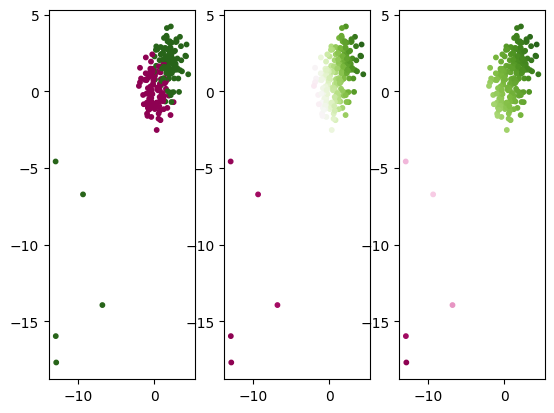

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=3)
axs[0].scatter(X[:, 0], X[:, 1], c=y, s=10, cmap=plt.cm.PiYG)
axs[1].scatter(X[:, 0], X[:, 1], c=y_predict, s=10, cmap=plt.cm.PiYG)
axs[2].scatter(X[:, 0], X[:, 1], c=y_predict_reg, s=10, cmap=plt.cm.PiYG)

пробую менять длину шага

In [24]:
def grad_reg_iter(X, y, w=np.array([0, 0]), C = 0, e=0.00001, max_step=10000, k=0.1):
    for s in range(max_step):
        w_prev = w
        w = np.array([new_w(X, y, 0, w, C, k), new_w(X, y, 1, w, C, k)])
        if LA.norm((w - w_prev)) <= e:
            break
    return s, w

<ipython-input-21-10b52a1e665d>:2: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-y[i] * (w[0]*X[i][0] + w[1]*X[i][1])))


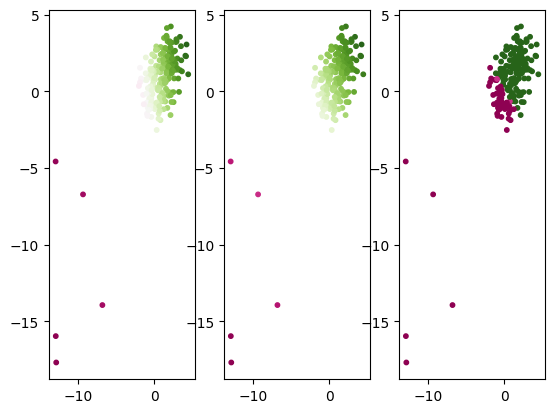

In [25]:
s1, w1 = grad_reg_iter(X, y, k=0.01)
s11, w11 = grad_reg_iter(X, y, k=0.0001)
s111, w111 = grad_reg_iter(X, y, k=100)
y_predict1 = sigma_f(X, w1)
y_predict11 = sigma_f(X, w11)
y_predict111 = sigma_f(X, w111)
fig, axs = plt.subplots(nrows=1, ncols=3)
axs[0].scatter(X[:, 0], X[:, 1], c=y_predict1, s=10, cmap=plt.cm.PiYG)
axs[1].scatter(X[:, 0], X[:, 1], c=y_predict11, s=10, cmap=plt.cm.PiYG)
axs[2].scatter(X[:, 0], X[:, 1], c=y_predict111, s=10, cmap=plt.cm.PiYG)

In [26]:
print(s1, s11, s111)

1478 8635 9999


1)При уменьшении шага количество итераций увеличивается
2)При достаточно большой длине шага алгоритм не сходится к решению задачи

<ipython-input-21-10b52a1e665d>:2: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-y[i] * (w[0]*X[i][0] + w[1]*X[i][1])))


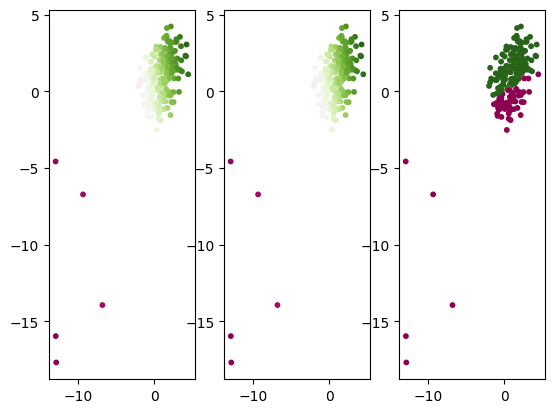

In [27]:
s1, w1 = grad_reg_iter(X, y, w=np.array([100, 100]))
s11, w11 = grad_reg_iter(X, y, w=np.array([0, -100]))
s111, w111 = grad_reg_iter(X, y, w=np.array([-30, 1000]))
y_predict1 = sigma_f(X, w1)
y_predict11 = sigma_f(X, w11)
y_predict111 = sigma_f(X, w111)
fig, axs = plt.subplots(nrows=1, ncols=3)
axs[0].scatter(X[:, 0], X[:, 1], c=y_predict1, s=10, cmap=plt.cm.PiYG)
axs[1].scatter(X[:, 0], X[:, 1], c=y_predict11, s=10, cmap=plt.cm.PiYG)
axs[2].scatter(X[:, 0], X[:, 1], c=y_predict111, s=10, cmap=plt.cm.PiYG)

In [28]:
print(s1, s11, s111)

2826 2453 9999


Да, судя по всему начальное приближение влияет на вид решения